In [28]:
import pandas as pd
import glob
import os
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from pathlib import Path


In [29]:
df = pd.read_csv("temporal_features2.csv")

In [30]:
y = df['condition']
X = df.drop(columns=['condition'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
rf = RandomForestClassifier(random_state=42)

# Identify non-numeric columns in X_train
non_numeric_cols = X_train.select_dtypes(include=['object']).columns

if len(non_numeric_cols) > 0:
    print(f"Non-numeric columns found, performing one-hot encoding: {non_numeric_cols.tolist()}")

    # Apply one-hot encoding to X_train and X_test
    # Using drop_first=True to avoid multicollinearity
    X_train_encoded = pd.get_dummies(X_train, columns=non_numeric_cols, drop_first=True)
    X_test_encoded = pd.get_dummies(X_test, columns=non_numeric_cols, drop_first=True)

    # Align columns - crucial for consistency between train and test sets
    # Get all column names from the training set after encoding
    train_cols = X_train_encoded.columns
    # Reindex the test set to match the training set columns, filling missing with 0
    X_test_aligned = X_test_encoded.reindex(columns=train_cols, fill_value=0)

    # Update X_train and X_test to their encoded versions
    X_train = X_train_encoded
    X_test = X_test_aligned
    print("Non-numeric columns one-hot encoded and datasets aligned.")
else:
    print("No non-numeric columns found. Proceeding with original data.")

rf.fit(X_train, y_train)

Non-numeric columns found, performing one-hot encoding: ['sensor']
Non-numeric columns one-hot encoded and datasets aligned.


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [32]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

                         precision    recall  f1-score   support

horizontal-misalignment       0.33      0.23      0.27        26
              imbalance       0.48      0.47      0.47        45
                 normal       0.00      0.00      0.00         6
               overhang       0.55      0.64      0.59        77
              underhang       0.58      0.65      0.61        77
  vertical-misalignment       0.43      0.34      0.38        38

               accuracy                           0.52       269
              macro avg       0.40      0.39      0.39       269
           weighted avg       0.50      0.52      0.50       269

Matriz de confusión:
[[ 6  5  1  5  4  5]
 [ 3 21  0 13  6  2]
 [ 0  2  0  1  0  3]
 [ 6  4  0 49 15  3]
 [ 0  5  1 17 50  4]
 [ 3  7  0  4 11 13]]


                        feature  importance
8                 zero-crossing    0.122700
6                      kurtosis    0.119239
7                      skewness    0.110618
0                          mean    0.107604
4                           max    0.107039
3                           min    0.103795
5                           ptp    0.101149
1                           std    0.093625
2                           rms    0.088513
10   sensor_acc_over_tangential    0.011708
9        sensor_acc_over_radial    0.009040
12      sensor_acc_under_radial    0.008593
13  sensor_acc_under_tangential    0.007383
11       sensor_acc_under_axial    0.004715
14            sensor_microphone    0.003483
15            sensor_tachometer    0.000798


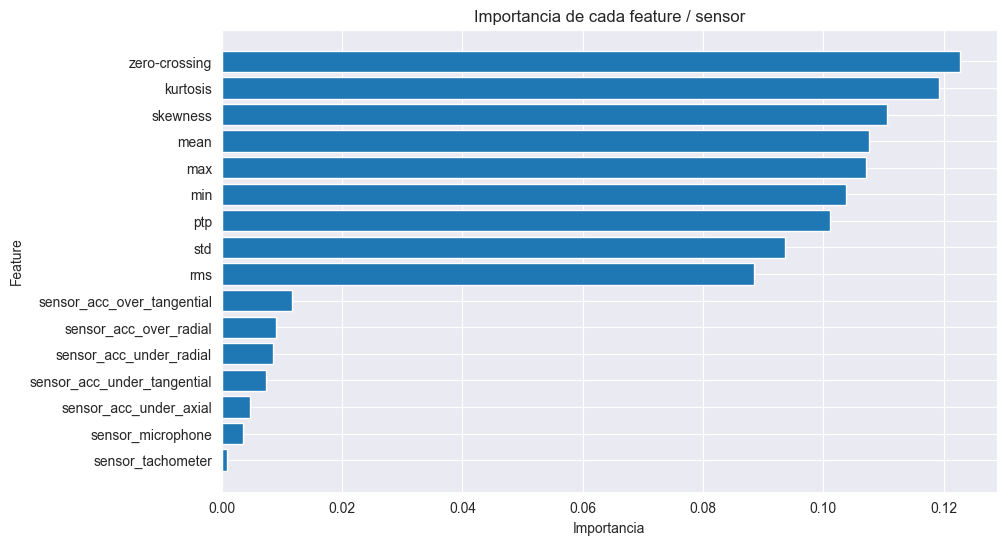

In [33]:
importances = rf.feature_importances_
feature_names = X_train.columns  # Use X_train.columns which reflect the encoded features
feat_imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)
print(feat_imp_df)

plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['feature'], feat_imp_df['importance'])
plt.xlabel('Importancia')
plt.ylabel('Feature')
plt.title('Importancia de cada feature / sensor')
plt.gca().invert_yaxis()
plt.show()